In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("scr-dataset.csv")
dataset

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438
...,...,...
435,44.5,1.354955
436,44.6,1.523446
437,44.7,1.648505
438,44.8,1.727490


Text(0, 0.5, 'y')

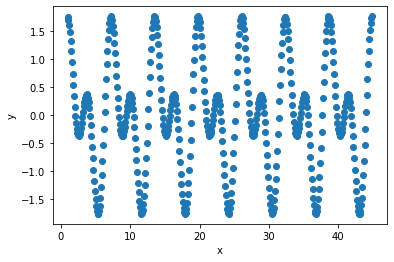

In [3]:
x_train = np.array(dataset.x)
y_train = np.array(dataset.y)
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")

as we can see in the graph, the data follows a specific pattern

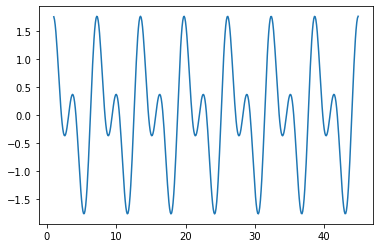

In [4]:
# like this
function = plt.plot(x_train, y_train)
function

#### finding the first maximas and minimas to derive the pattern

In [10]:
x_train.shape

(440,)

In [29]:
first_maxi = 0
first_mini = 0
sec_maxi = 0
sec_mini = 0
i = 0
while i < 440 :
    if((i>0 and i<439) and (y_train[i-1]>y_train[i] and y_train[i+1]>y_train[i])) :
        first_mini = i
        break
    i += 1
while i < 440 :
    if((i>0 and i<439) and (y_train[i-1]<y_train[i] and y_train[i+1]<y_train[i])) :
        sec_maxi = i
        break
    i += 1
while i < 440 :
    if((i>0 and i<439) and (y_train[i-1]>y_train[i] and y_train[i+1]>y_train[i])) :
        sec_mini = i
        break
    i += 1

43


In [30]:
print(first_maxi, first_mini, sec_maxi, sec_mini)

0 16 27 43


In [35]:
third_maxi = 0
while i < 440 :
    if((i>0 and i<439) and (y_train[i-1]<y_train[i] and y_train[i+1]<y_train[i])) :
        third_maxi = i
        break
    i += 1

In [37]:
print(x_train[first_mini] - x_train[first_maxi])

1.6000000000000014


In [38]:
print(x_train[sec_maxi] - x_train[first_mini])

1.1


In [39]:
print(x_train[sec_mini] - x_train[sec_maxi])

1.6000000000000028


In [40]:
print(x_train[third_maxi] - x_train[sec_mini])

1.9000000000000012


In [41]:
print(x_train[third_maxi] - x_train[first_maxi])

6.2000000000000055


Our last datapoint has x_value 44.9.</br>
If we substract 44.9 from 50, we get 5.1.</br>
But, we saw that the pattern repeats itself after every 6.2 x_values.</br>
So, we have to divide the x_value(50) into num_patterns.

In [43]:
len_pattern = x_train[third_maxi] - x_train[first_maxi]
num_patterns = 50/len_pattern
print(num_patterns)

8.064516129032251


In [49]:
import math
num_total_patterns = math.floor(num_patterns)
final_maxi = num_total_patterns*len_pattern
print(final_maxi)

49.600000000000044


In [50]:
## now, If we substract this number from 50, we get ...
difference = 50 - final_maxi
print(difference)

0.39999999999995595


# or

In [52]:
# difference = 50%len_pattern

now, if we just move this number to the right to the first maxima, which is at position x = 1,</br>
then we will have desired output.

In [54]:
# but first, we have to make the 'difference' compatible for calculation
# for that, we have to round it off to 1 decimal place
difference = round(difference, 1)
print(difference)

0.4


In [69]:
diction = {}
for i in range(440) :
    x_train[i] = round(x_train[i], 1)
    diction[x_train[i]] = y_train[i]

In [70]:
required_x_value = x_train[0] + difference
predicted_answer = diction[required_x_value]
print(predicted_answer)

1.3204378801443646


## This is the required answer

### Thus, if we write the functions

In [ ]:
# diction = {}
# for i in range(440) :
#     x_train[i] = round(x_train[i], 1)
#     diction[x_train[i]] = y_train[i]

In [71]:
def train(x_train, y_train) :
    first_maxi = 0
    second_maxi = 0
    third_maxi = 0
    x_train_len = len(x_train)
    i = 0
    while i < x_train_len :
        if((i>0 and i<x_train_len-1) and (y_train[i-1]<y_train[i] and y_train[i+1]<y_train[i])) :
            sec_maxi = i
            break
        i += 1
    i += 1 # skipping the sec_maxi
    while i < x_train_len :
        if((i>0 and i<x_train_len-1) and (y_train[i-1]<y_train[i] and y_train[i+1]<y_train[i])) :
            third_maxi = i
            break
        i += 1
    len_pattern = x_train[third_maxi] - x_train[first_maxi]
    return len_pattern

In [72]:
def predict(len_pattern, x_pred) :
    difference = x_pred%len_pattern
    # print(difference)
    difference = round(difference, 1)
    required_x_value = x_train[0] + difference
    predicted_answer = diction[required_x_value]
    return predicted_answer

In [73]:
len_pattern1 = train(x_train, y_train)
required_answer = predict(len_pattern1, 50)
print(required_answer)

1.3204378801443646
